In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gold_price = pd.read_csv("goldstock.csv")

In [4]:
gold_price.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [5]:
gold_price = gold_price.drop(["Date"], axis=1)

In [6]:
gold_price.head()

,Unnamed: 0,Close,Volume,Open,High,Low
0,0,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2051.6,250946.0,2033.2,2067.3,2033.1


In [7]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Close       2511 non-null   float64
 2   Volume      2511 non-null   float64
 3   Open        2511 non-null   float64
 4   High        2511 non-null   float64
 5   Low         2511 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 117.8 KB


In [8]:
gold_price.isnull().sum()

,0
Unnamed: 0,0
Close,0
Volume,0
Open,0
High,0
Low,0


In [9]:
gold_price.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


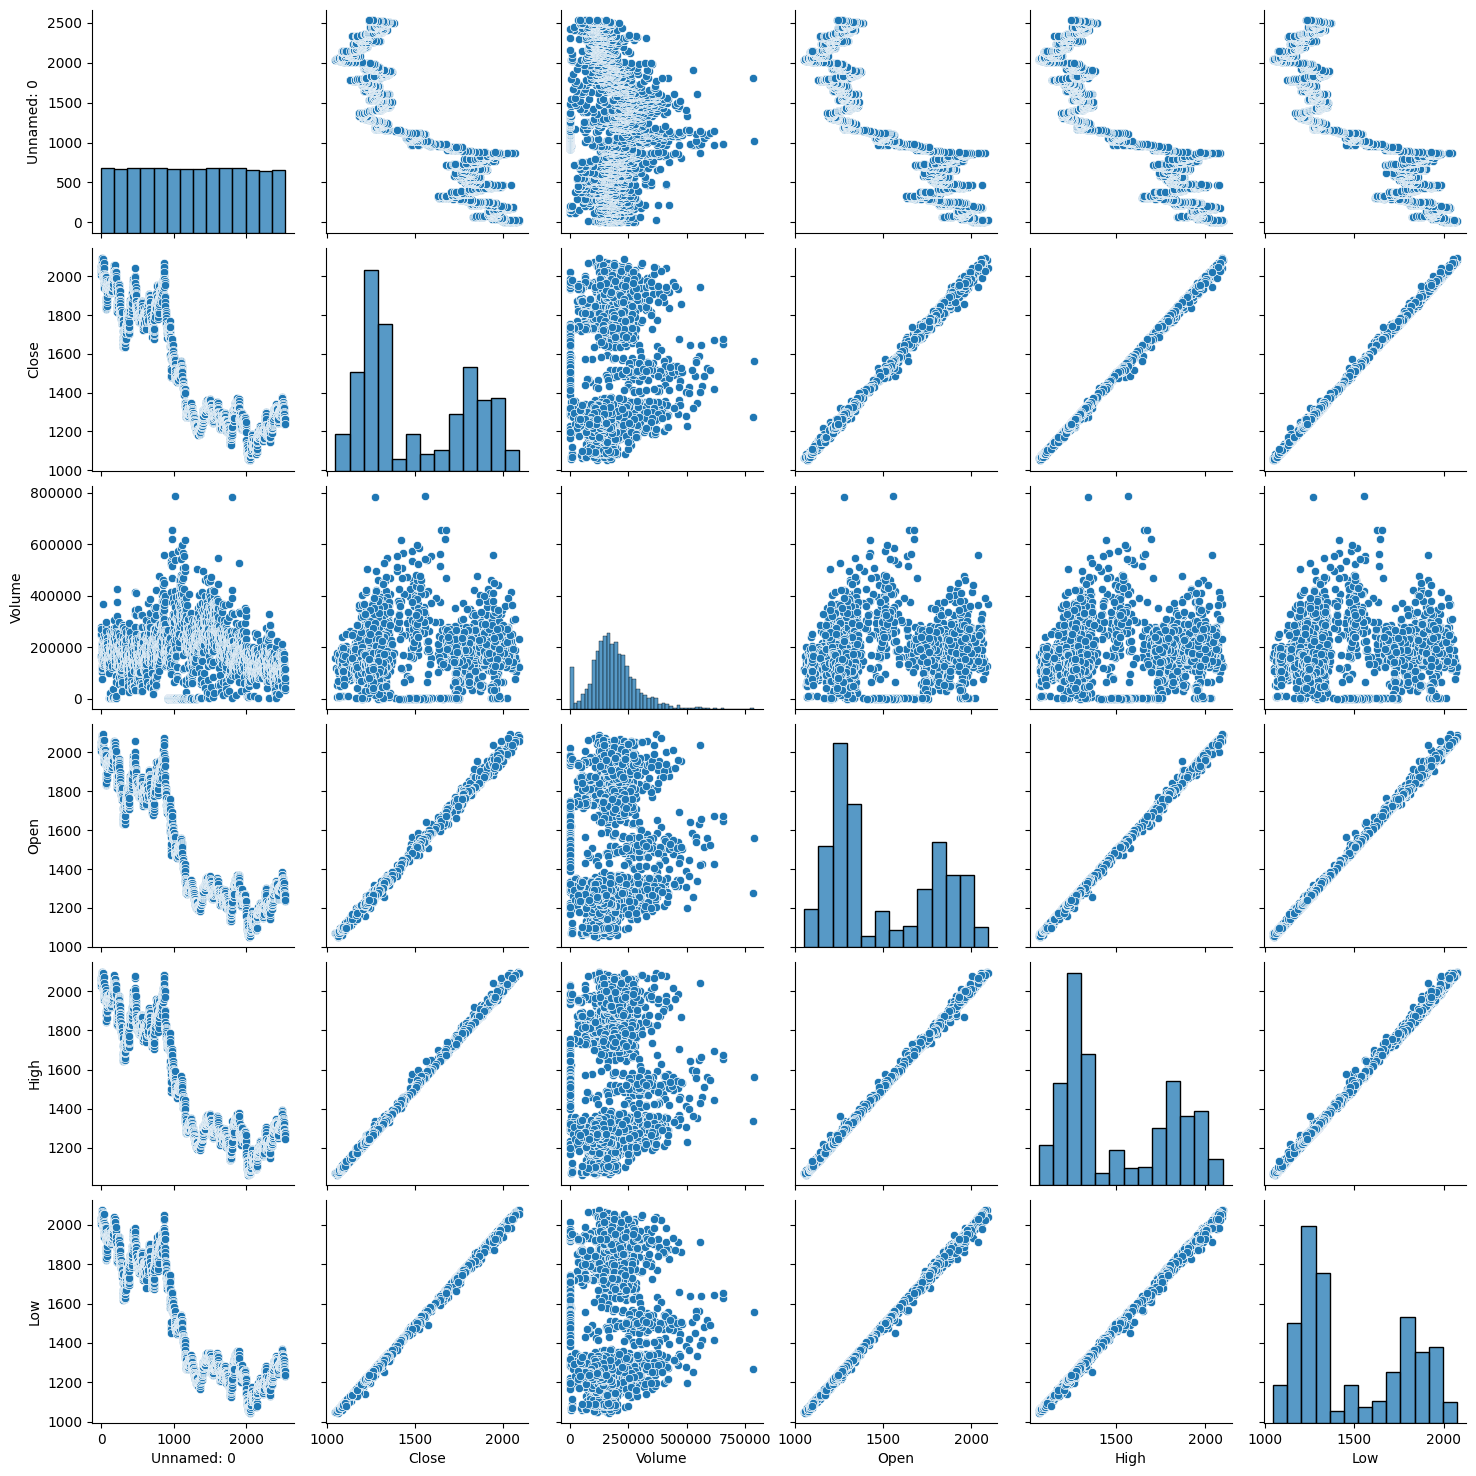

In [10]:
sns.pairplot(gold_price)

In [11]:
correlation = gold_price.corr()

<Axes: >

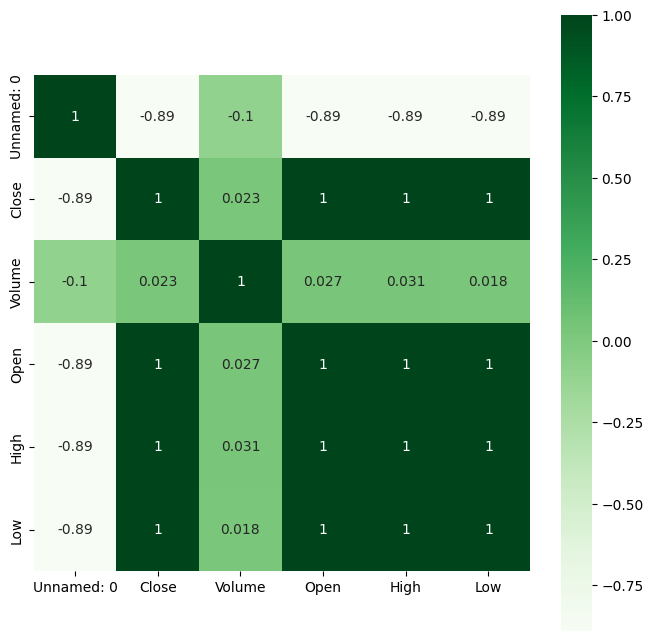

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, square = True, annot = True, cmap="Greens")

In [13]:
correlation['High'].sort_values(ascending=False)

,High
High,1.000000
Close,0.999524
Open,0.999459
Low,0.999251
Volume,0.030871
Unnamed: 0,-0.888441


In [14]:
x_values = gold_price.drop(['High'],axis=1)
y_values = gold_price['High']

print(x_values,y_values)

      Unnamed: 0   Close    Volume    Open     Low
0              0  2029.3  166078.0  2027.4  2022.2
1              1  2021.6  167013.0  2009.1  2007.7
2              2  2006.5  245194.0  2031.7  2004.6
3              3  2030.2  277995.0  2053.4  2027.6
4              4  2051.6  250946.0  2033.2  2033.1
...          ...     ...       ...     ...     ...
2506        2528  1250.5   81426.0  1254.9  1248.0
2507        2529  1263.5   63419.0  1269.9  1252.0
2508        2530  1264.5   34998.0  1264.3  1256.9
2509        2531  1262.5   41697.0  1235.1  1230.8
2510        2532  1238.6   80262.0  1240.5  1235.5

[2511 rows x 5 columns] 0       2041.9
1       2025.6
2       2036.1
3       2062.8
4       2067.3
         ...  
2506    1261.9
2507    1280.1
2508    1273.2
2509    1267.1
2510    1243.5
Name: High, Length: 2511, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x_values, y_values, test_size=0.2)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2008, 5)
(2008,)
(503, 5)
(503,)


In [17]:
from sklearn.linear_model import LinearRegression
Linear_reg = LinearRegression()
Linear_reg.fit(x_train,y_train)
print('linear reg train score : ',Linear_reg.score(x_train,y_train))
print('linear reg test score : ',Linear_reg.score(x_test,y_test))

linear reg train score :  0.9996072383038698
linear reg test score :  0.9995931965723889


In [18]:
Linear_reg_y_pred = Linear_reg.predict(x_test)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [20]:
Linear_reg_r2_score = r2_score(y_test, Linear_reg_y_pred)
print("linear regression r2 score: ",Linear_reg_r2_score)

linear regression r2 score:  0.9995931965723889


In [21]:
MAPE = mean_absolute_percentage_error(y_test, Linear_reg_y_pred)
Accuracy_linear_reg = 1-MAPE
print("Accuracy linear regression : ",Accuracy_linear_reg)

Accuracy linear regression :  0.9973743001279309


In [22]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

In [23]:
Extra_reg = ExtraTreesRegressor(n_estimators=100, random_state=100)
Random_reg = RandomForestRegressor(n_estimators=100, random_state=100)
Extra_reg.fit(x_train,y_train)
Random_reg.fit(x_train,y_train)
print('EXtra reg train score : ',Extra_reg.score(x_train,y_train))
print('Extra reg test score : ',Extra_reg.score(x_test,y_test))

print('Random reg train score : ',Random_reg.score(x_train,y_train))
print('Random reg test score : ',Random_reg.score(x_test,y_test))

EXtra reg train score :  0.9999999999505907
Extra reg test score :  0.9995446993740783
Random reg train score :  0.9999358123317796
Random reg test score :  0.9995026621967411


In [24]:
Extra_reg_y_pred = Extra_reg.predict(x_test)
Random_reg_y_pred = Random_reg.predict(x_test)

In [25]:
Extra_reg_r2_score = r2_score(y_test, Extra_reg_y_pred)
print("Extra regression r2 score: ",Extra_reg_r2_score)

Random_reg_r2_score = r2_score(y_test, Random_reg_y_pred)
print("Random regression r2 score: ",Random_reg_r2_score)

Extra regression r2 score:  0.9995446993740783
Random regression r2 score:  0.9995026621967411


In [27]:
MAPE = mean_absolute_percentage_error(y_test, Extra_reg_y_pred)
Accuracy_Extra_reg = 1-MAPE
print("Accuracy Extra regression : ",Accuracy_Extra_reg)

MAPE = mean_absolute_percentage_error(y_test, Random_reg_y_pred)
Accuracy_Random_reg = 1-MAPE
print("Accuracy Random regression : ",Accuracy_Random_reg)

Accuracy Extra regression :  0.9974447914180179
Accuracy Random regression :  0.9973350351999318


In [28]:
from sklearn.svm import SVR

In [29]:
svm = SVR(kernel='linear')
svm.fit(x_train,y_train)

print('svm reg train score : ',svm.score(x_train,y_train))
print('svm reg test score : ',svm.score(x_test,y_test))

svm reg train score :  -30.274517530219043
svm reg test score :  -26.571719040456664


In [30]:
svm_y_pred = svm.predict(x_test)
svm_r2_score = r2_score(y_test, svm_y_pred)
print("svm regression r2 score: ",svm_r2_score)
MAPE = mean_absolute_percentage_error(y_test, svm_y_pred)
Accuracy_svm_reg = 1-MAPE
print("Accuracy SVM regression : ",Accuracy_svm_reg)

svm regression r2 score:  -26.571719040456664
Accuracy SVM regression :  0.10359018533158881


In [31]:
prediced_df =  pd.DataFrame({
    "Linear_reg_y_pred":Linear_reg_y_pred,
    "Extra_reg_y_pred":Extra_reg_y_pred,
    "Random_reg_y_pred":Random_reg_y_pred,
    "svm_y_pred":svm_y_pred,
    "y_test":y_test
})

In [32]:
prediced_df.head()

,Linear_reg_y_pred,Extra_reg_y_pred,Random_reg_y_pred,svm_y_pred,y_test
634,1813.221229,1811.630,1811.894,489.718625,1819.5
794,1906.232855,1902.663,1903.668,1374.345697,1898.0
34,2076.876607,2078.900,2079.463,846.294458,2072.7
1298,1199.390114,1201.717,1202.457,390.470877,1201.3
1823,1259.370348,1261.913,1261.670,712.593696,1260.5


In [33]:
best_model = []
for ind in prediced_df.index:
    pred_values = np.array(prediced_df[prediced_df.index==ind].values[0])
    pred_values = np.abs(pred_values[:-1] - pred_values[-1])
    best_model.append(prediced_df.columns[np.argmin(pred_values)])

prediced_df['best_model'] = best_model

In [34]:
prediced_df.head()

,Linear_reg_y_pred,Extra_reg_y_pred,Random_reg_y_pred,svm_y_pred,y_test,best_model
634,1813.221229,1811.630,1811.894,489.718625,1819.5,Linear_reg_y_pred
794,1906.232855,1902.663,1903.668,1374.345697,1898.0,Extra_reg_y_pred
34,2076.876607,2078.900,2079.463,846.294458,2072.7,Linear_reg_y_pred
1298,1199.390114,1201.717,1202.457,390.470877,1201.3,Extra_reg_y_pred
1823,1259.370348,1261.913,1261.670,712.593696,1260.5,Linear_reg_y_pred


In [35]:
prediced_df.best_model.value_counts()

,count
best_model,
Linear_reg_y_pred,190
Extra_reg_y_pred,165
Random_reg_y_pred,148


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(x_train, y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10838122.0000 - val_loss: 1186462.5000
Epoch 2/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1128281.5000 - val_loss: 1103516.3750
Epoch 3/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1044767.7500 - val_loss: 907611.4375
Epoch 4/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 751545.1250 - val_loss: 294572.4688
Epoch 5/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259559.8750 - val_loss: 126059.6328
Epoch 6/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100965.0469 - val_loss: 45413.5156
Epoch 7/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41612.4688 - val_loss: 13310.5400
Epoch 8/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11202.9268 - val_loss: 3590.9253
Epoch 9/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2660.6301 - val_loss: 845.3315
Epoch 10/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 617.5516 - val_loss: 330.0977
Epoch 11/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

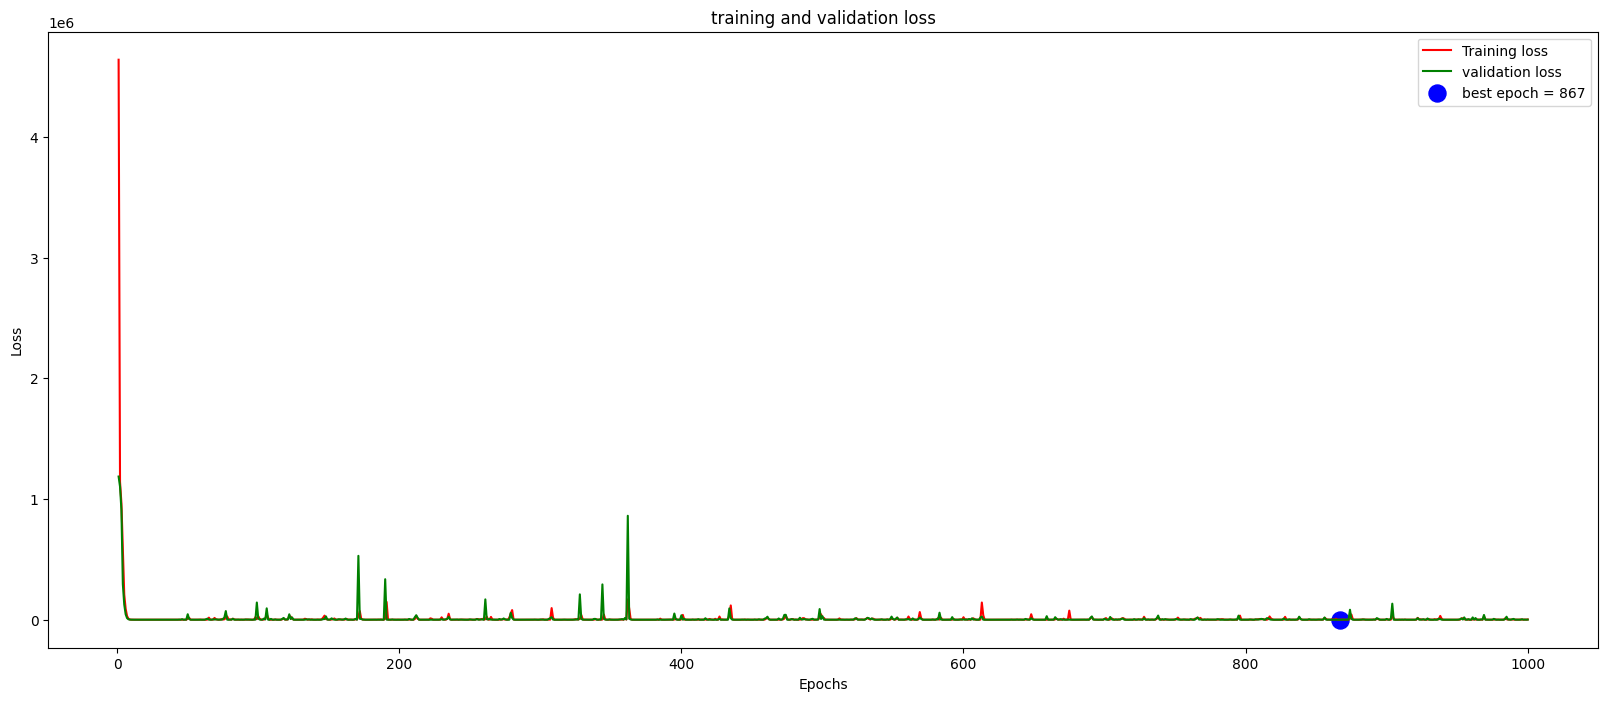

In [38]:
model_loss = history.history['loss']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(model_loss))]
loss_label = f'best epoch = {str(index_loss +1)}'

plt.figure(figsize=(20,8))

plt.plot(Epochs, model_loss, 'r', label = 'Training loss')
plt.plot(Epochs, val_loss, 'g', label = 'validation loss')
plt.scatter(index_loss+1,val_lowest,s=150, c='blue', label=loss_label)
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [39]:
ann_y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [40]:
ann_r2_score = r2_score(y_test, ann_y_pred)
print("ann_r2_score : ",ann_r2_score)

ann_r2_score :  0.9908561009079826


In [41]:
MAPE = mean_absolute_percentage_error(y_test, ann_y_pred)
Accuracy_ann_reg = 1-MAPE
print("Accuracy ANN regression : ",Accuracy_ann_reg)

Accuracy ANN regression :  0.982379417309846


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
